# Install detectron2

In [8]:
!python -m pip install pyyaml==5.3.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-9hw20gmv
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-9hw20gmv


In [9]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [10]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Download do dataset de imagens de laranjeiras:

In [11]:
!wget  https://github.com/MiniHulk1183/project_orange/raw/main/Imagens/Imagens_arvores_laranjas_v1.zip -O laranjeiras.zip
!unzip "/content/laranjeiras.zip" -d "/content/laranjeiras"

--2022-12-12 07:25:22--  https://github.com/MiniHulk1183/project_orange/raw/main/Imagens/Imagens_arvores_laranjas_v1.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MiniHulk1183/project_orange/main/Imagens/Imagens_arvores_laranjas_v1.zip [following]
--2022-12-12 07:25:22--  https://raw.githubusercontent.com/MiniHulk1183/project_orange/main/Imagens/Imagens_arvores_laranjas_v1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15351147 (15M) [application/zip]
Saving to: ‘laranjeiras.zip’

laranjeiras.zip     100%[===================>]  14.64M  --.-KB/s    in 0.04s   

2022-12-12 07:25:23 

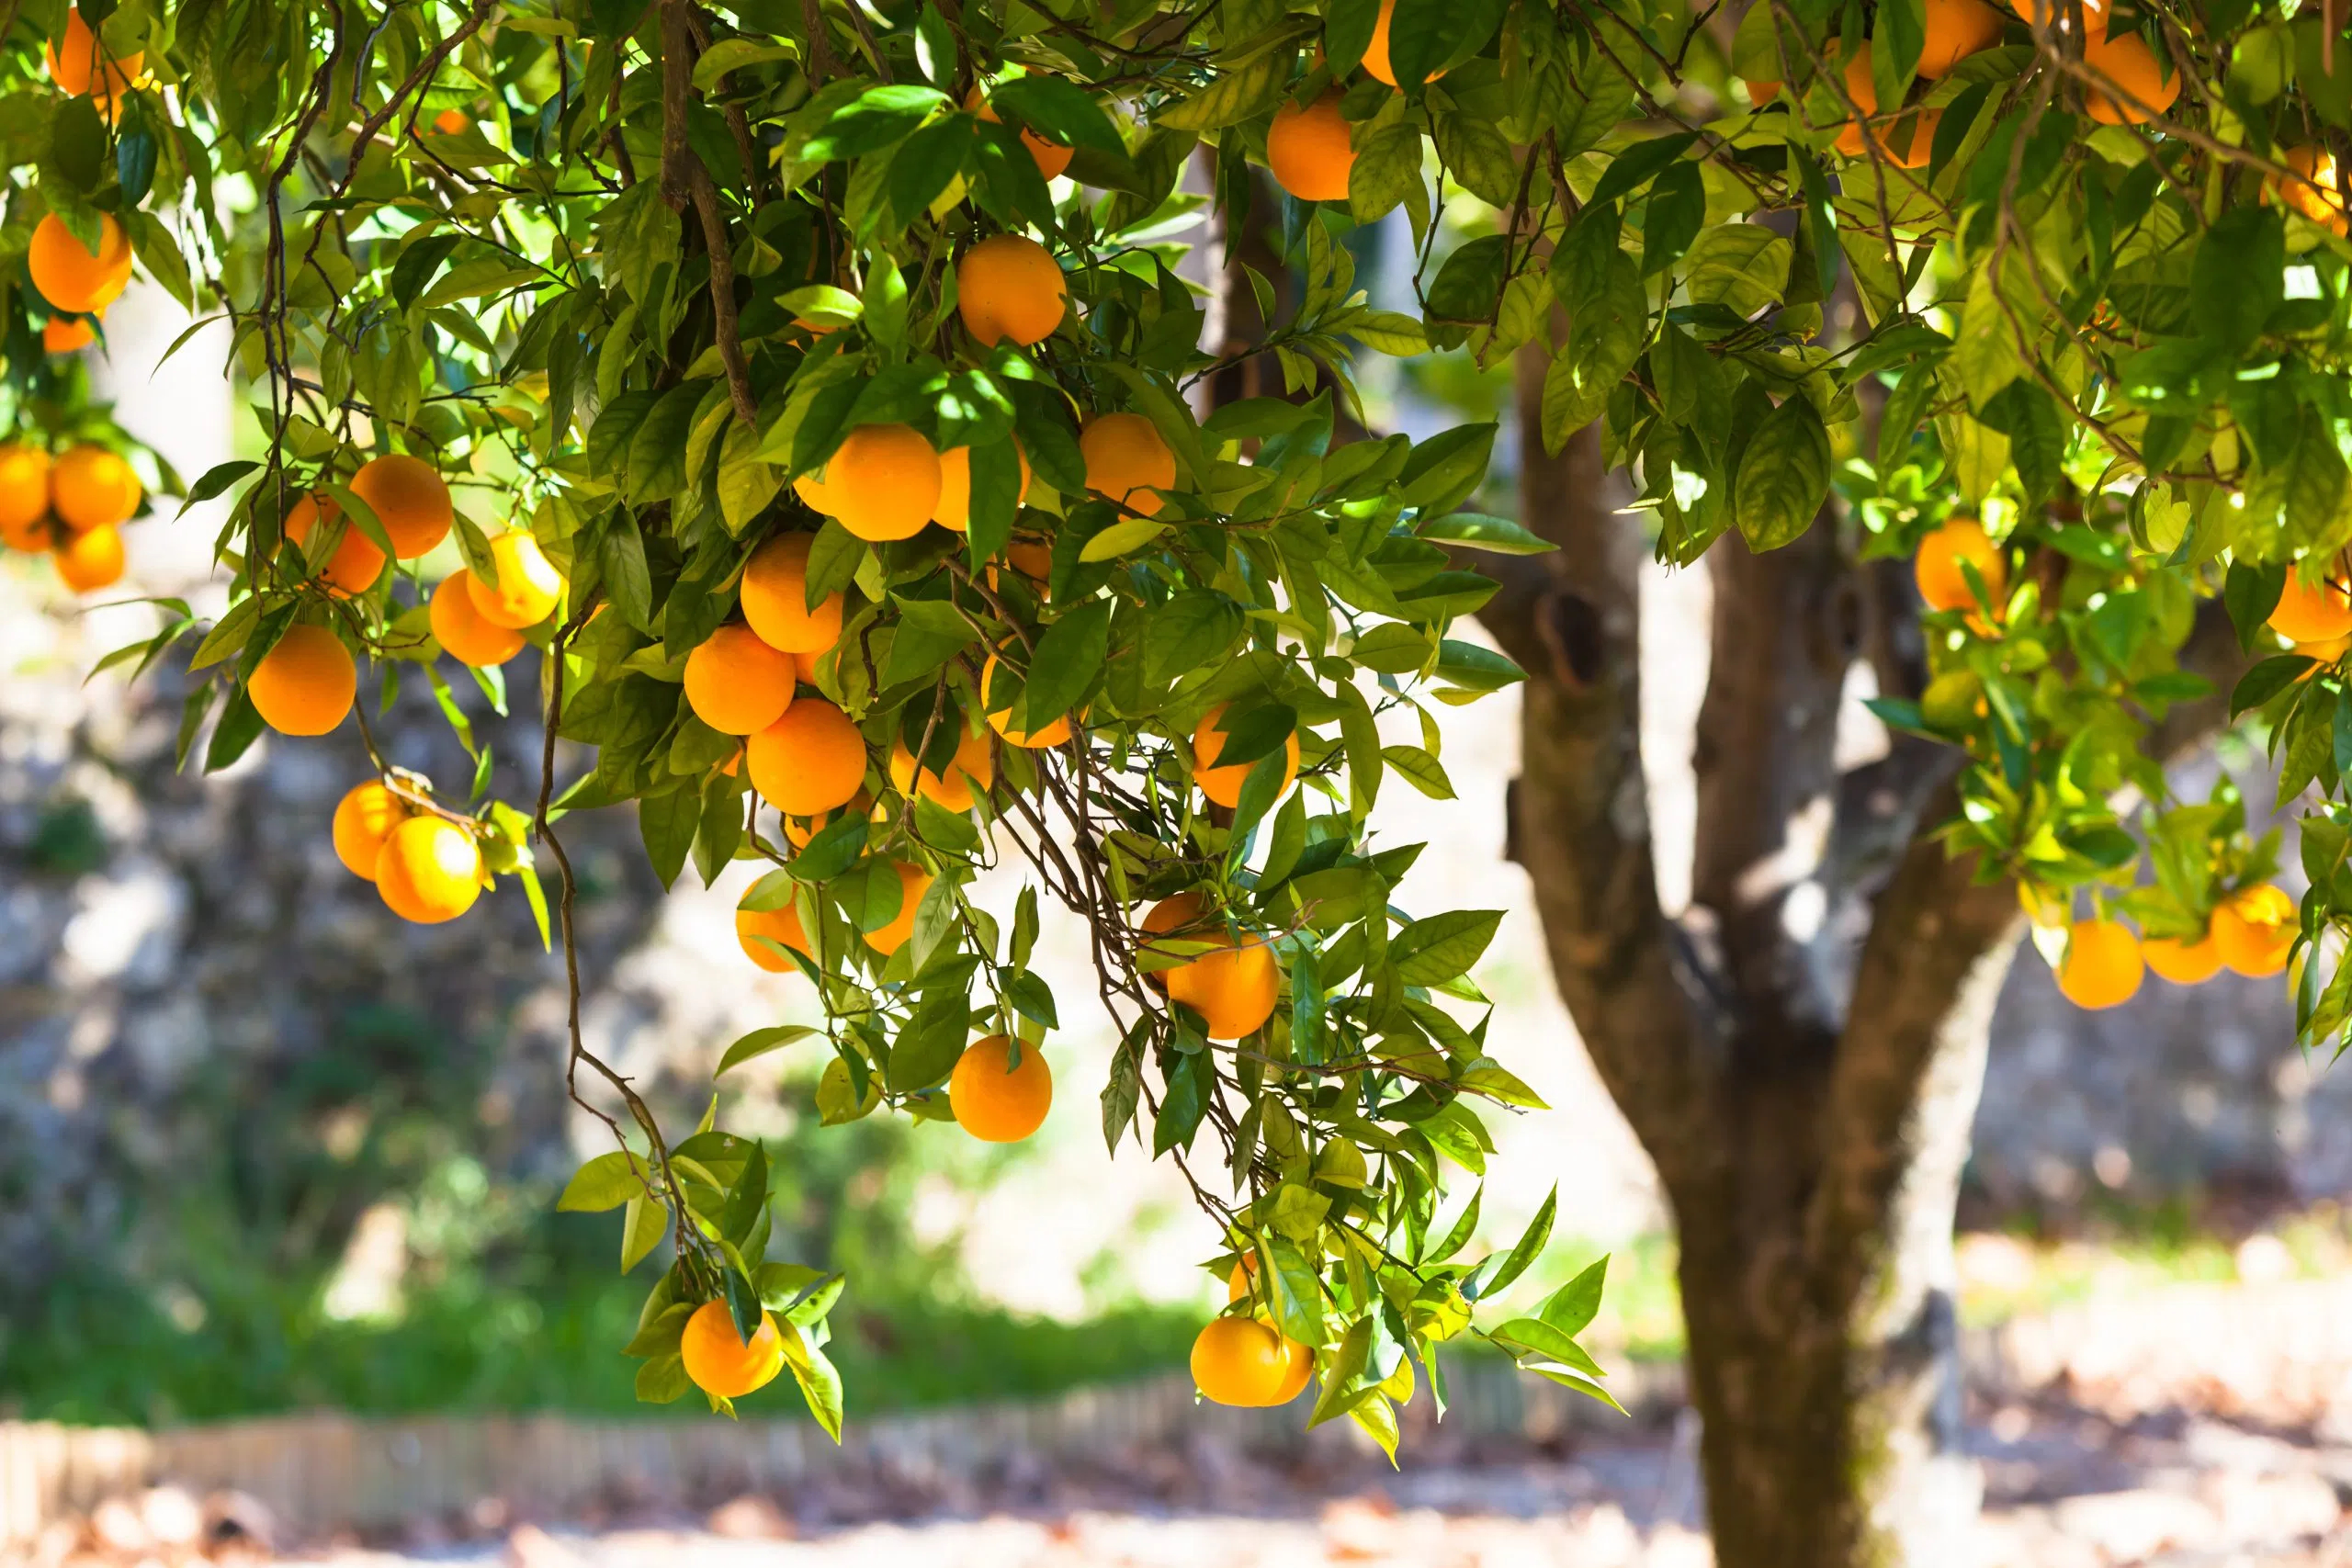

In [12]:
im = cv2.imread("/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_18.jpg")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [16]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
#outputs = predictor(im)

In [19]:
import os,glob
import pandas as pd

counter = 0
folder = "/content/laranjeiras/Imagens_arvores_laranjas/*.jpg"
resultados = []

for filename in glob.glob(folder):
  image_path = os.path.join(folder,filename)
  print(image_path)
  resultados.append(image_path)
  im = cv2.imread(image_path)

  outputs = predictor(im)

  resultados.append(len(outputs['instances']))
  #print(filename)

  num_laranjas=0
  for i in outputs['instances'].pred_classes:
    if i == 49: #numero da classe da laranja
      num_laranjas+=1

  resultados.append(num_laranjas)

  # We can use `Visualizer` to draw the predictions on the image.
  #v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
  #out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  #cv2_imshow(out.get_image()[:, :, ::-1])

df = pd.DataFrame(np.reshape(resultados,(-1, 3)), columns=['Image_path', 'Instances', 'Oranges'])

df.to_csv("dados_detectron2_laranjas.csv")

/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_11.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_29.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_14.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_20.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_24.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_3.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_5.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_22.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_12.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_2.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_9.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_33.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_17.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_26.jpg
/content/laranjeiras/Imagens_arvores_laranjas/laranjeira_16.jpg
/content/laranjeiras/Imagens_arvores_laranja